# Introduction

The purpose of this project will be to create a multivariable regression using the accepted loan dataset found in Kaggle. The source of the data is linked in the READ.DM file on github and contains 1,048,575 observations and 145 variables. Disclosure the source dataset found on Kaggle is extremely large at about 1.6 GB. For the purpose of this project, I have removed about 109 redundant variables to reduce computational slowdowns on python. 

# Purpose

Lending Club the company who this data is derived from has collected a million observations of people who got accepted for loans. Considering their data, the main goal for this project will be to determine the most significant variables that cause interest rates to change among borrowers who got accepted for loans. Therefor, I will be using a multivariable regression with **int_rate** (a variable that shows the percent of interest in a loan) , as the target variable. 

# Importing the data

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Loans.csv')

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_36764\3746424693.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('Loans.csv')


# Data Exploration

In [3]:
data.head()

,id,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,...,Balance_To_limit,mort_acc,num_actv_bc_tl,employment_,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,36.0,13.99,123.03,C,leadman,10.0,MORTGAGE,55000.0,...,37.2,1.0,2.0,4.0,76.9,0.0,0.0,N,Cash,N
1,68355089,24700.0,36.0,11.99,820.28,C,Engineer,10.0,MORTGAGE,65000.0,...,27.1,4.0,5.0,5.0,97.4,0.0,0.0,N,Cash,N
2,68341763,20000.0,60.0,10.78,432.66,B,truck driver,10.0,MORTGAGE,63000.0,...,55.9,5.0,2.0,3.0,100.0,0.0,0.0,N,Cash,N
3,66310712,35000.0,60.0,14.85,829.90,C,Information Systems Officer,10.0,MORTGAGE,110000.0,...,12.1,1.0,4.0,5.0,100.0,0.0,0.0,N,Cash,N
4,68476807,10400.0,60.0,22.45,289.91,F,Contract Specialist,3.0,MORTGAGE,104433.0,...,77.5,6.0,4.0,6.0,96.6,0.0,0.0,N,Cash,N


------------

Using data.info() we can see that there are 1,048,575 observations and 37 variables in the dataset note that there are both numerical and categorical variables in the data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1048575 non-null  object 
 1   loan_amnt             1048563 non-null  float64
 2   term                  1048563 non-null  float64
 3   int_rate              1048563 non-null  float64
 4   installment           1048563 non-null  float64
 5   grade                 1048563 non-null  object 
 6   emp_title             975084 non-null   object 
 7   emp_length            978615 non-null   float64
 8   home_ownership        1048563 non-null  object 
 9   annual_inc            1048563 non-null  float64
 10  verification          1048563 non-null  object 
 11  purpose               1048563 non-null  object 
 12  title                 1036426 non-null  object 
 13  addr_state            1048563 non-null  object 
 14  dti                   1047707 non-

--------

Next, we want to check if null values exist in the data. Note that we want null values as a percentage value of all observations in a column. Considering the size of the dataset its better to know a percentage value  of null values rather than a vague null count.

In [5]:
# Check for null values in each column
null_percentages = (data.isnull().sum() / len(data)) * 100

print(null_percentages)

id                       0.000000
loan_amnt                0.001144
term                     0.001144
int_rate                 0.001144
installment              0.001144
grade                    0.001144
emp_title                7.008655
emp_length               6.671912
home_ownership           0.001144
annual_inc               0.001144
verification             0.001144
purpose                  0.001144
title                    1.158620
addr_state               0.001144
dti                      0.082779
delinq_2yrs              0.001144
fico_score               0.001144
inq_last_6mths           0.001144
open_acc                 0.001144
pub_rec                  0.001144
total_acc                0.001144
application_type         0.001144
acc_now_delinq           0.001144
tot_cur_bal              0.001144
total_rev_hi_lim         0.001144
Inquiries               38.121737
Finance_Trades          38.121737
Balance_To_limit         1.166822
mort_acc                 0.001144
num_actv_bc_tl

---

Now lets explore our categorical values and find how many unique categories exist in each categorical variable. The results here show that the variable **id** and **emp_title** have an abnormaly large amount of unique categories. 

In [6]:
#lets check the number of unique categories in our categorical variables
for column in data.columns:
    if data[column].dtype == 'object':  # if the column is categorical
        num_unique_categories = data[column].nunique()
        print(f'{column}: {num_unique_categories} unique categories')

id: 1048575 unique categories
grade: 7 unique categories
emp_title: 237261 unique categories
home_ownership: 5 unique categories
verification: 3 unique categories
purpose: 14 unique categories
title: 27 unique categories
addr_state: 50 unique categories
application_type: 2 unique categories
hardship_flag: 2 unique categories
disbursement_method: 2 unique categories
debt_settlement_flag: 2 unique categories


# Data Cleaning

Considering our previous findings, we need to drop both **id** and **emp_title** from the data. The reasoning behind this is because we’re going to create dummy variables for all the unique categories and it is impractical to create 237,261 dummy variables  for one categorical variable like **emp_title**.  

In [7]:
#drops id and emp_title
data = data.drop(columns='id')
data = data.drop(columns='emp_title')

---

While were at it, we might as well remove all null values from our categorical values. Considering that we had relatively low percentages of null values in our categorical variables. 

In [8]:
# Removes rows/observations of null categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.dropna(subset=categorical_columns)

---

Now that our categorical variables are free from null values and have workable amounts of unique categories, we can now convert our categorical variables into dummy variables. We will create a new variable called **data_dummies** and store the data there. 

In [9]:
#creates dummy variables 
data_dummies = pd.get_dummies(data, drop_first=True)

---

The following code now checks that our categorical variables have been converted correctly. All categorical variables will now be defined by the data type **uint8**.

In [10]:
#Checks that the dummy variables changed to uint8
data_dummies.dtypes

loan_amnt                        float64
term                             float64
int_rate                         float64
installment                      float64
emp_length                       float64
                                  ...   
addr_state_WY                      uint8
application_type_Joint App         uint8
hardship_flag_Y                    uint8
disbursement_method_DirectPay      uint8
debt_settlement_flag_Y             uint8
Length: 129, dtype: object

---

Now that our categorical variables are clean , we can now focus on cleaning the numerical variables. The following code imputes integer variables with a columns mean.Note that were still storing the imputation in the data_dummies variable. 

In [11]:
#Imputes the mean for all integer variables with null values
numerical_columns = data_dummies.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    data_dummies[column].fillna(data_dummies[column].mean(), inplace=True)

---

Lets now check that our dataset *data_dummies* is free from null values. 

In [12]:
# Lets check again for Null values
null_percentages = (data_dummies.isnull().sum() / len(data)) * 100

print(null_percentages)

loan_amnt                        0.0
term                             0.0
int_rate                         0.0
installment                      0.0
emp_length                       0.0
                                ... 
addr_state_WY                    0.0
application_type_Joint App       0.0
hardship_flag_Y                  0.0
disbursement_method_DirectPay    0.0
debt_settlement_flag_Y           0.0
Length: 129, dtype: float64


# Multicollinearity

Before starting our regression model, it is important to check for multicollinearity. Multicollinearity refers to a situation in which two or more explanatory variables in a regression model are highly linearly related. For that I will be using Variance Inflation Factor (VIF) note that if VIF is 1 then the variables are not correlated, similarly a value greater than 1 indicates that the variables are correlated. If VIF is very high (greater than 5 or 10), then the variables are highly correlated and we must consider dropping them one at a time. Usually this means we must drop the variable with the highest VIF value. 

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numeric columns
numeric_columns = data_dummies.select_dtypes(include=['int64', 'float64'])

# Add a constant column for the VIF calculation
numeric_columns['constant'] = 1

# Calculate the VIF for each column
vif = pd.DataFrame()
vif["Variable"] = numeric_columns.columns
vif["VIF"] = [variance_inflation_factor(numeric_columns.values, i) for i in range(numeric_columns.shape[1])]

print(vif)

                Variable          VIF
0              loan_amnt    49.559525
1                   term     6.303748
2               int_rate     2.488693
3            installment    42.475684
4             emp_length     1.065701
5             annual_inc     1.079726
6                    dti     1.095939
7            delinq_2yrs     1.302126
8             fico_score     2.095888
9         inq_last_6mths     1.138594
10              open_acc     3.708138
11               pub_rec     9.058279
12             total_acc     2.727462
13        acc_now_delinq     1.017816
14           tot_cur_bal     1.784751
15      total_rev_hi_lim     1.734722
16             Inquiries     1.082455
17        Finance_Trades     1.096925
18      Balance_To_limit     1.579951
19              mort_acc     1.655026
20        num_actv_bc_tl     3.349613
21           employment_     4.378010
22        pct_tl_nvr_dlq     1.449585
23  pub_rec_bankruptcies     4.560269
24             tax_liens     5.240377
25          

---

Since the variable **loan_amnt** had the highest variance we must drop it first and then check for VIF again.

In [14]:
# Drop the 'loan_amnt' variable
data_dummies = data_dummies.drop(columns='loan_amnt')

# Recalculate the VIFs
numeric_columns = data_dummies.select_dtypes(include=['int64', 'float64'])
numeric_columns['constant'] = 1
vif = pd.DataFrame()
vif["Variable"] = numeric_columns.columns
vif["VIF"] = [variance_inflation_factor(numeric_columns.values, i) for i in range(numeric_columns.shape[1])]
print(vif)

                Variable         VIF
0                   term    1.255736
1               int_rate    1.635041
2            installment    1.238938
3             emp_length    1.065594
4             annual_inc    1.079480
5                    dti    1.095921
6            delinq_2yrs    1.302126
7             fico_score    2.095649
8         inq_last_6mths    1.138587
9               open_acc    3.707855
10               pub_rec    9.058278
11             total_acc    2.727007
12        acc_now_delinq    1.017808
13           tot_cur_bal    1.782417
14      total_rev_hi_lim    1.729095
15             Inquiries    1.082445
16        Finance_Trades    1.096852
17      Balance_To_limit    1.579605
18              mort_acc    1.654743
19        num_actv_bc_tl    3.349585
20           employment_    4.377800
21        pct_tl_nvr_dlq    1.449569
22  pub_rec_bankruptcies    4.560004
23             tax_liens    5.240351
24              constant  998.036992


___

Now we must drop the variable **pub_rec** and check that we have less than 5 VIF in our model.

In [15]:
# Drop the 'pub_rec' variable
data_dummies = data_dummies.drop(columns='pub_rec')

# Recalculate the VIFs
numeric_columns = data_dummies.select_dtypes(include=['int64', 'float64'])
numeric_columns['constant'] = 1
vif = pd.DataFrame()
vif["Variable"] = numeric_columns.columns
vif["VIF"] = [variance_inflation_factor(numeric_columns.values, i) for i in range(numeric_columns.shape[1])]
print(vif)

                Variable         VIF
0                   term    1.255681
1               int_rate    1.635038
2            installment    1.238724
3             emp_length    1.065127
4             annual_inc    1.079479
5                    dti    1.095851
6            delinq_2yrs    1.300808
7             fico_score    2.087770
8         inq_last_6mths    1.138109
9               open_acc    3.707684
10             total_acc    2.726981
11        acc_now_delinq    1.017806
12           tot_cur_bal    1.782402
13      total_rev_hi_lim    1.728688
14             Inquiries    1.082442
15        Finance_Trades    1.096844
16      Balance_To_limit    1.577471
17              mort_acc    1.654536
18        num_actv_bc_tl    3.348861
19           employment_    4.377417
20        pct_tl_nvr_dlq    1.447637
21  pub_rec_bankruptcies    1.126445
22             tax_liens    1.008517
23              constant  991.280023


# Feature Scaling

Since our VIF checked out okay we can now focus on feature scaling. Feature scaling is important because it can help the regression algorithm to converge more quickly and can also prevent certain features from dominating simply because they have a larger scale. The two most common forms of scaling are standardization and normalization. In order to know which form to use we must first check if our data has a Gaussian distribution if it does, we can use Standardization if not we must use Normalization.

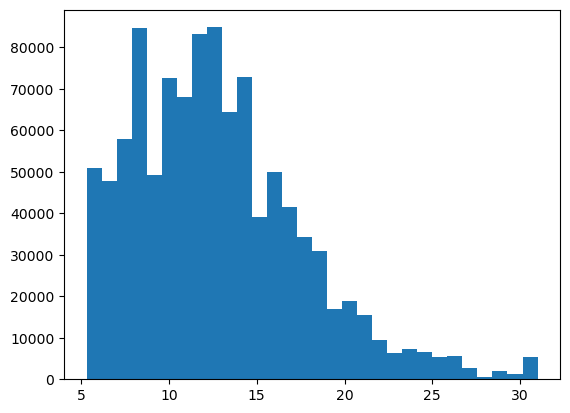

In [16]:
import matplotlib.pyplot as plt

# Lets check if our target variable is normally distributed
plt.hist(data_dummies['int_rate'], bins=30)
plt.show()

---


The histogram tells us that the data is not normally distributed. Therefor me must use normalization to scale our data. Normalization (or min-max scaling) will rescale our numerical variables into features that will range from 0 to 1.

Note that normalization must only occur with our numerical variables, therefor will first create a scaler object for normalization (*MinMaxScaler()*) and then we will isolate the numerical variables into a new variable called **numeric_columns**. After the numeric variables are isolated, we will then scale them using our scaler object. In the scaling process the scaled numeric variables will be assigned a new name **data_scaled**. Finally, we will update the **data_scaled** variable by converting the scaled numeric variables back into a dataframe.

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Select only the numeric columns
numeric_columns = data_dummies.select_dtypes(include=['int64', 'float64'])


# Fit the scaler and transform the data
data_scaled = scaler.fit_transform(numeric_columns)

# Convert back to a dataframe
data_scaled = pd.DataFrame(data_scaled, columns=numeric_columns.columns)

---

Having scaled the numeric variables we know must isolate our categorical variables into a new variable called **dummy_colums**

In [ ]:
# Get the dummy variables from the original DataFrame
dummy_columns = data_dummies.select_dtypes(include=['uint8'])

---

Before we can combine our newly scaled numeric variables with our categorical data, we must first reset the indices. The reason for this is because, when we use pd.concat() to merge our scaled numeric and categorical variables , pandas will try to align the data based on indices. If the indices in **data_scaled** and **dummy_columns** don't match, we will get NaN values in the resulting DataFrame.

In [ ]:
# Reset the indices of both DataFrames
data_scaled = data_scaled.reset_index(drop=True)
dummy_columns = dummy_columns.reset_index(drop=True)

# Combine the scaled DataFrame and the dummy variables
data_scaled = pd.concat([data_scaled, dummy_columns], axis=1)

---

# Linear Regression

Now that our data is clean, scaled, and has been checked for variance, we can now start building the multivariable regression model. The following lines of code will split our data set into a training set of 85% and test set 15% and will store the values into 4 varialbles **X_train**, **X_test**, **y_train**, **y_test**.

In [18]:
from sklearn.model_selection import train_test_split

# Lets train the data 
X = data_scaled.drop('int_rate', axis=1)
y = data_scaled['int_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


Next we will create a model and fit our training data

In [19]:
from sklearn.linear_model import LinearRegression

# Create a model object
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

Finally we will run the model 

In [20]:
import statsmodels.api as sm

# Separate the predictors (X) and the target variable (y)
X = data_scaled.drop('int_rate', axis=1)
y = data_scaled['int_rate']

# Add a constant to the predictors
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print out the statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 9.200e+04
Date:                Sat, 10 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:57:17   Log-Likelihood:             1.5484e+06
No. Observations:             1036426   AIC:                        -3.097e+06
Df Residuals:                 1036300   BIC:                        -3.095e+06
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

# Interpreting the model

The following are some basic interpretations that can be made of the model. Similarly, all the variables displayed by the regression result are deemed to be significant at predicting interest rate. 

**Adjsuted R-squared**:approximately 91.7% of the variability in interest rate can be explained by the predictor variables shown in the regression results. 

**Numeric Coefficients** : Since our data was normalized we need to interpret the variables differently, below I attached examples on how you would interpret the numeric variable *term* if it was standaridized, normalized, and not scaled . 

*Term (Not Scaled)*:For each additional month in the term of the loan, the interest rate increases by 0.0083 percentage points on average, assuming all other factors remain constant.

*term (Standardized)*: for each increase of one standard deviation in the term of the loan, the interest rate increases by 0.0083 standard deviations on average, assuming all other factors remain constant.

*term (Normalized)*:if the length of the loan term goes from the shortest possible term to the longest possible term, the model predicts that the interest rate will increase by an amount equal to 0.83% of the total possible range of interest rates.

**Categorical Coefficients**: For categorical variables we must compare the coefficient with the zero group. In this case for hardship_flag the zero group is hardship_flag_N.

*Hardship_flag_Y (Not Scaled)*:the presence of economic hardship (hardship_flag_Y'= 1) is associated with an increase in interest rate by 0.0211 units compared to the absence of economic hardship (hardship_flag_Y' = 0).